# Lab 5 PS - Moroianu Theodor

In [23]:
# import stuff
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt

## Ex 1

In [45]:
# Definesc tipurile de fereastra.

def dreptunghiular(N):
    a = np.ones((N,))
    return a / a.sum()

def hanning(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    a = 0.5 * (1 - np.cos(points))
    return a / a.sum()
    
def hamming(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    a = 0.54 - 0.46 * np.cos(points)
    return a / a.sum()

def blackman(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    a = 0.42 - 0.5 * np.cos(points) + 0.08 * np.cos(2 * points)
    return a / a.sum()

def flat_top(N):
    points = np.array([2 * np.pi * n / N for n in range(N)])
    a = (0.22 -
        0.42 * np.cos(points) +
        0.28 * np.cos(2 * points) -
        0.08 * np.cos(2 * points) +
        0.007 * np.cos(4 * points))
    return a / a.sum()

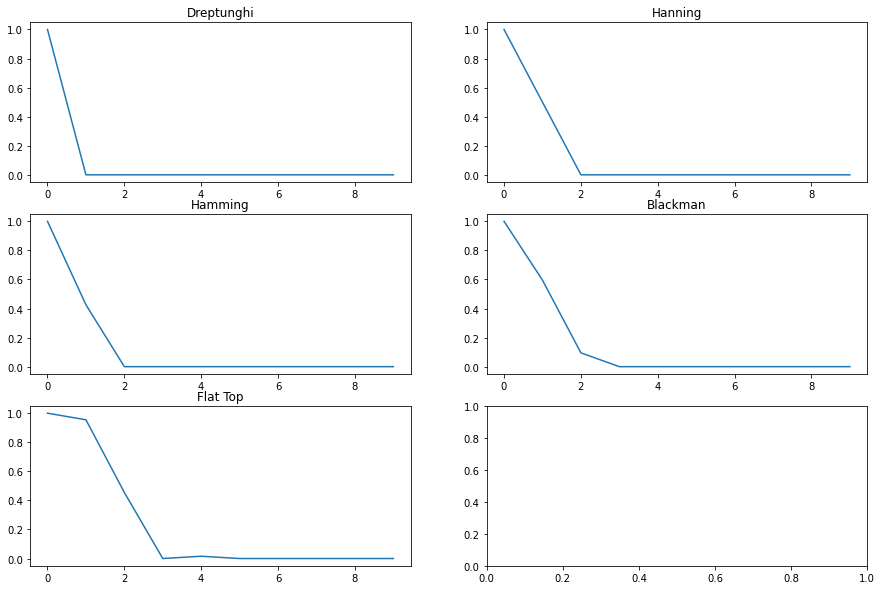

In [98]:
N = 10000
# calculez ferestrele
semnal_dreptunghiular = dreptunghiular(N)
semnal_hanning = hanning(N)
semnal_hamming = hamming(N)
semnal_blackman = blackman(N)
semnal_flat_top = flat_top(N)

def compute_dft(s):
    d = np.fft.fft(s)
    d = np.abs(d)
    d = d[:len(d)//2]
    # Ca sa arate mai bine, pastrez doar o parte din semnal
    d = d[:10]
    return d

DFT_dreptunghi = compute_dft(semnal_dreptunghiular)
DFT_hanning = compute_dft(semnal_hanning)
DFT_hamming = compute_dft(semnal_hamming)
DFT_blackman = compute_dft(semnal_blackman)
DFT_flat_top = compute_dft(semnal_flat_top)


fig, axs = plt.subplots(3, 2)
axs[0, 0].plot(DFT_dreptunghi)
axs[0, 0].set_title('Dreptunghi')
axs[0, 1].plot(DFT_hanning)
axs[0, 1].set_title('Hanning')
axs[1, 0].plot(DFT_hamming)
axs[1, 0].set_title("Hamming")
axs[1, 1].plot(DFT_blackman)
axs[1, 1].set_title('Blackman')
axs[2, 0].plot(DFT_flat_top)
axs[2, 0].set_title('Flat Top')

fig.set_figwidth(15)
fig.set_figheight(10)

plt.show()

## Ex 2

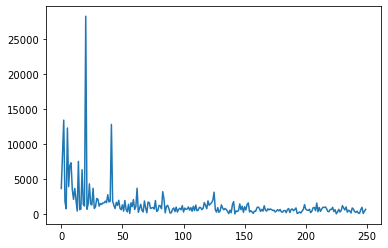

In [100]:
# A
# read trafic
trafic_raw = np.array([int(x) for x in open("trafic.csv", "r").read().split()[1:]])
trafic_dft = np.abs(np.fft.fft(trafic_raw))
trafic_dft = trafic_dft[:len(trafic_dft) // 2]

# Ignor prima pozitie, care este noise.
plt.plot(trafic_dft[1:])

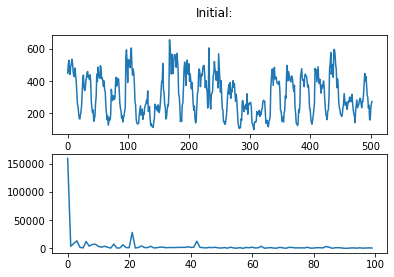

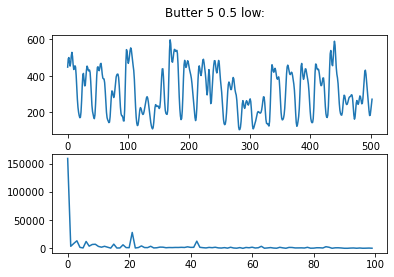

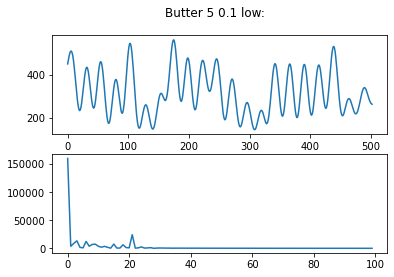

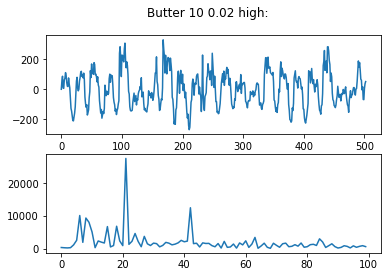

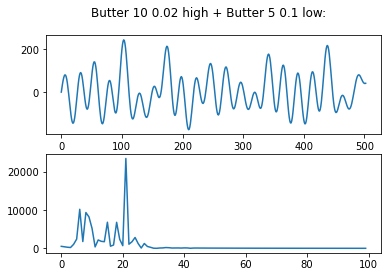

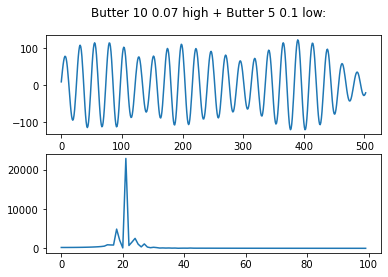

In [67]:
# B

def show_dft_with_filter(trafic_smooth, title):
    fig, axs = plt.subplots(2, 1)
    fig.suptitle(title)
    axs[0].plot(trafic_smooth)
    trafic_dft = np.abs(np.fft.fft(trafic_smooth))
    trafic_dft = trafic_dft[:len(trafic_dft) // 2]
    axs[1].plot(trafic_dft[:100])
    plt.show()

show_dft_with_filter(trafic_raw, "Initial:")

show_dft_with_filter(
    signal.filtfilt(*signal.butter(5, 0.4, btype='low'), trafic_raw),
    "Butter 5 0.5 low:"
)

show_dft_with_filter(
    signal.filtfilt(*signal.butter(5, 0.1, btype='low'), trafic_raw), 
    "Butter 5 0.1 low:"
)

show_dft_with_filter(
    signal.filtfilt(*signal.butter(10, 0.02, btype='high'), trafic_raw),
    "Butter 10 0.02 high:"
)

show_dft_with_filter(
    signal.filtfilt(
        *signal.butter(5, 0.1, btype='low'),
        signal.filtfilt(*signal.butter(10, 0.02, btype='high'), trafic_raw)
    ),
    "Butter 10 0.02 high + Butter 5 0.1 low:"
)

show_dft_with_filter(
    signal.filtfilt(
        *signal.butter(5, 0.1, btype='low'),
        signal.filtfilt(*signal.butter(10, 0.07, btype='high'), trafic_raw)
    ),
    "Butter 10 0.07 high + Butter 5 0.1 low:"
)

In DFT-ul semnalului apar doua spike-uri mari.

 * Primul este la $0$, si este datorat numarului restrans de date.
 * Al doilea este la $21$. Pentru a evidentia acest spike, am aplicat si un filtru `high` peste semnal, asa cum se poate vedea in ultimul plot de mai sus.

Obervam ca semnalul nostru are $500$ de esantionane. Frecventa Nyquist este $\frac{1}{2}$ din frecventa de esantionare, adica $\frac{1}{2}$ puncte pe ora, sau $\frac{1}{2 * 3600} Hz$.

Observam ca spike-ul principal in DFT apare la pozitia $22$, care corespunde frecventei $\frac{22}{500}$ din frecventa Nyquist, sau $0.044$ din frecventa Nyquist.

Frecventa adevarata a semnalului nostru este $\frac{22}{500} * Nyquist = \frac{22}{500 * 3600} = 0.000012 Hz$.

Vedem ca $0.000012 * 3600 * 24 = 1$, ceea ce confirma ca am facut bine calculele (o schimbare pe zi).

Pentru a filtra aceasta frecventa, orice filtru care taie mai sus de $0.044 * 2$ (pentru ca ne uitam la frecventa Nyquist) din frecventa normalizata la Nyquist este corect. In ploturi am decis sa folosesc $0.1$ pentru filtrele low.

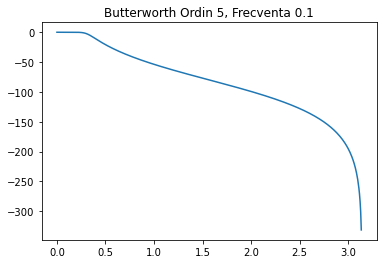

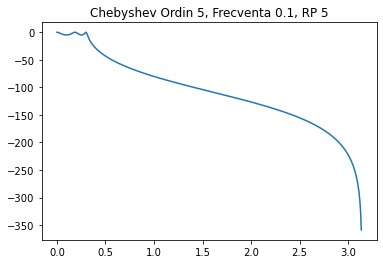

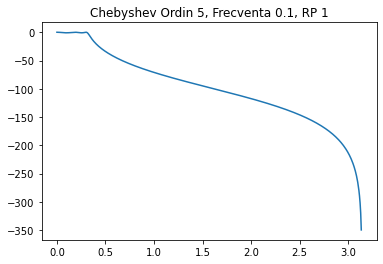

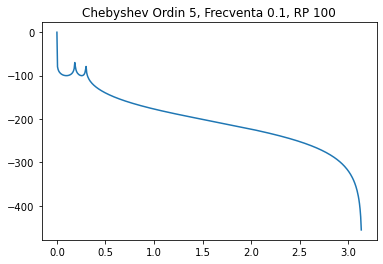

In [80]:
# C si D

a, b = signal.butter(5, 0.1, btype='low')
x, y = signal.freqz(a, b)

plt.title("Butterworth Ordin 5, Frecventa 0.1")
plt.plot(x, 20 * np.log10(np.abs(y)))
plt.show()


a, b = signal.cheby1(5, 5, 0.1, btype='low')
x, y = signal.freqz(a, b)

plt.title("Chebyshev Ordin 5, Frecventa 0.1, RP 5")
plt.plot(x, 20 * np.log10(np.abs(y)))
plt.show()


a, b = signal.cheby1(5, 1, 0.1, btype='low')
x, y = signal.freqz(a, b)

plt.title("Chebyshev Ordin 5, Frecventa 0.1, RP 1")
plt.plot(x, 20 * np.log10(np.abs(y)))
plt.show()

a, b = signal.cheby1(5, 100, 0.1, btype='low')
x, y = signal.freqz(a, b)

plt.title("Chebyshev Ordin 5, Frecventa 0.1, RP 100")
plt.plot(x, 20 * np.log10(np.abs(y)))
plt.show()


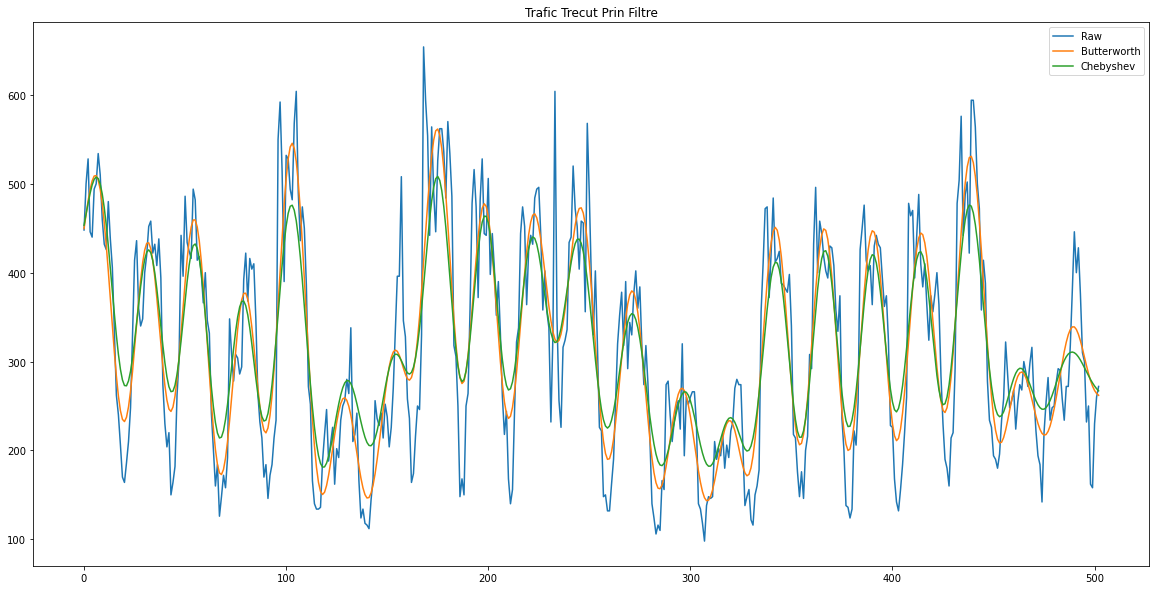

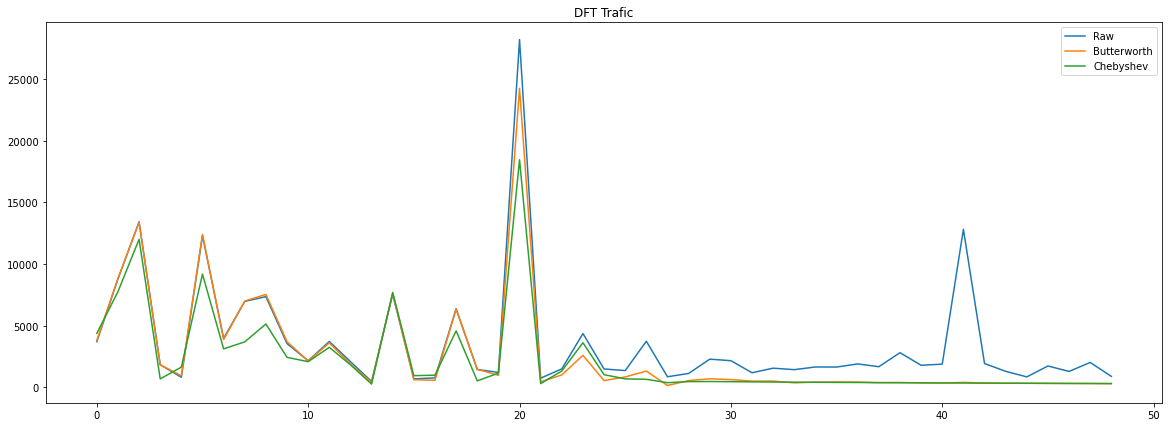

In [95]:
# E

def compute_fft(semnal):
    fft = np.fft.fft(semnal)
    fft = np.abs(fft)
    # luam doar o parte mica din puncte, pentru a le pune in valoare
    fft = fft[1:50]
    return fft

trafic_butter = signal.filtfilt(*signal.butter(5, 0.1, btype='low'), trafic_raw)
trafic_cheby = signal.filtfilt(*signal.cheby1(5, 2, 0.1, btype='low'), trafic_raw)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(trafic_raw, label="Raw")
plt.plot(trafic_butter, label="Butterworth")
plt.plot(trafic_cheby, label="Chebyshev")

plt.title("Trafic Trecut Prin Filtre")
plt.legend()
plt.show()


trafic_raw_fft = compute_fft(trafic_raw)
trafic_butter_fft = compute_fft(trafic_butter)
trafic_cheby_fft = compute_fft(trafic_cheby)

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(7)

plt.title("DFT Trafic")
plt.plot(trafic_raw_fft, label="Raw")
plt.plot(trafic_butter_fft, label="Butterworth")
plt.plot(trafic_cheby_fft, label="Chebyshev")

plt.legend()
plt.show()



In practica, as alege filtrul Butterworth, de-oarece este mai fidel datelor in domeniul timpului, si in domeniul frecventei are un spike mai accentuat la frecventa reala a figurii (la pozitia 22). Pe de alta parte, Chebyshev are avantajul de-a avea lobi secundari mai mici decat Butterworth.

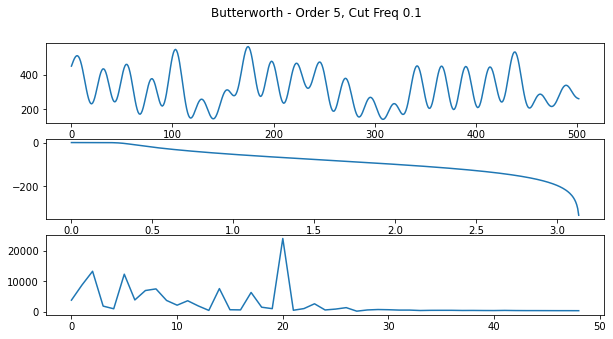

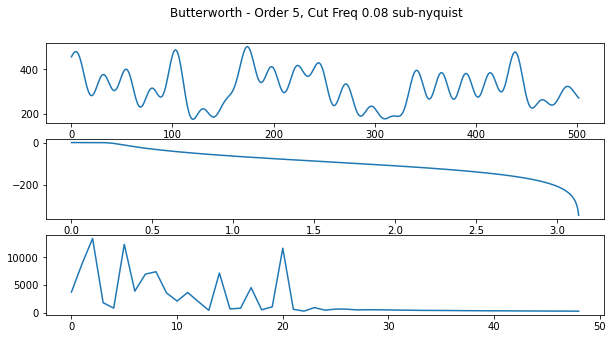

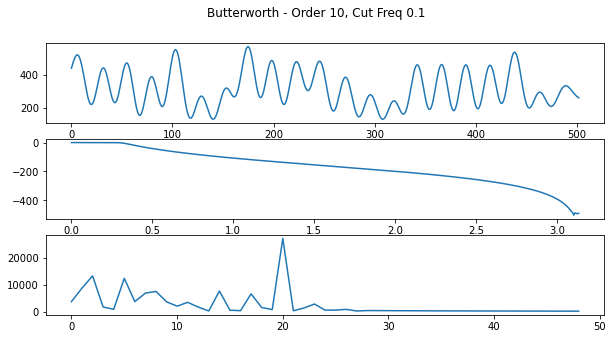

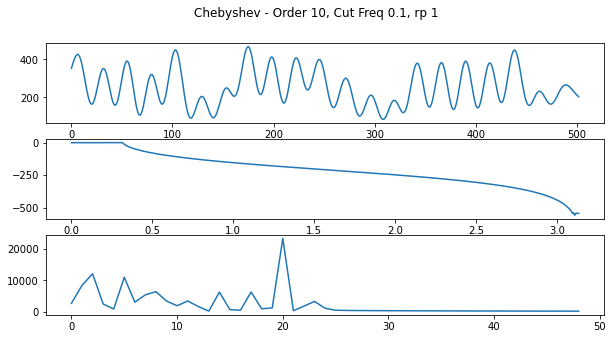

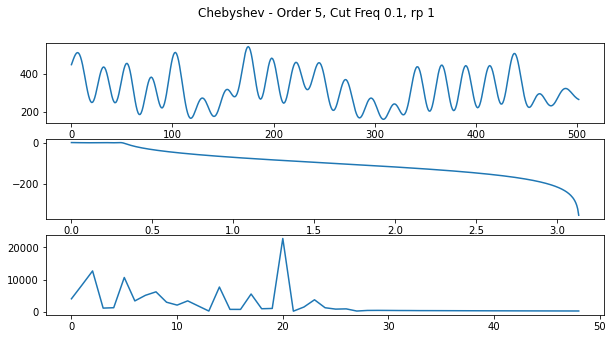

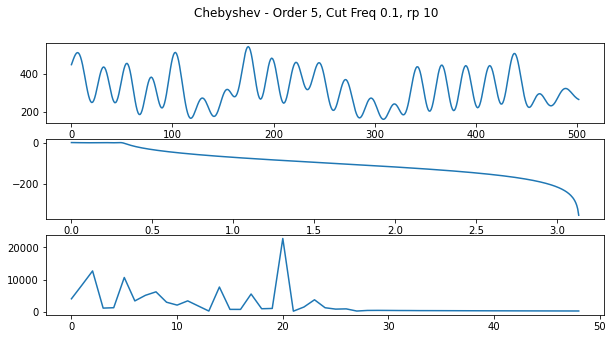

In [122]:
# F

def show_filter(a, b, name):
    trafic_smooth = signal.filtfilt(a, b, trafic_raw)
    fig, ax = plt.subplots(3, 1)

    ax[0].plot(trafic_smooth)

    x, y = signal.freqz(a, b)
    ax[1].plot(x, 20 * np.log10(np.abs(y)))

    ax[2].plot(compute_fft(trafic_smooth))

    fig.set_figwidth(10)
    fig.set_figheight(5)

    fig.suptitle(name)
    plt.show()

show_filter(*signal.butter(5, 0.1, btype='low'), "Butterworth - Order 5, Cut Freq 0.1")
show_filter(*signal.butter(5, 0.08, btype='low'), "Butterworth - Order 5, Cut Freq 0.08 sub-nyquist")
show_filter(*signal.butter(10, 0.1, btype='low'), "Butterworth - Order 10, Cut Freq 0.1")


show_filter(*signal.cheby1(10, 1, 0.1, btype='low'), "Chebyshev - Order 10, Cut Freq 0.1, rp 1")
show_filter(*signal.cheby1(5, 1, 0.1, btype='low'), "Chebyshev - Order 5, Cut Freq 0.1, rp 1")
show_filter(*signal.cheby1(5, 1, 0.1, btype='low'), "Chebyshev - Order 5, Cut Freq 0.1, rp 10")


Filtrul optim pare sa fie Butterworth de ordin 5 si cu o frecventa de taiere de $0.1$.

Putem totusi sa filtram si frecventele mai joase care ne deranjeaza, aplicand de doua ori un filtru, unul low-pass si altul high-band:

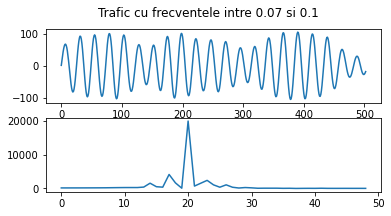

In [124]:
trafic_clean = signal.filtfilt(
    *signal.butter(5, 0.1, btype='low'),
    signal.filtfilt(*signal.butter(5, 0.07, btype='high'), trafic_raw)
)

fig, ax = plt.subplots(2, 1)

ax[0].plot(trafic_clean)

ax[1].plot(compute_fft(trafic_clean))

fig.set_figwidth(6)
fig.set_figheight(3)

fig.suptitle("Trafic cu frecventele intre 0.07 si 0.1")
plt.show()
